In [41]:
import os
import re
import pandas as pd
import numpy as np

In [42]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [43]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'be', 'needn', 'further', "doesn't", 'does', 'they', 'y', 'wouldn', 'isn', "couldn't", 'but', 'here', 'with', 'below', 'been', 'did', 'too', 'against', 'can', "shan't", "aren't", 'he', 'above', 'themselves', 'again', 'didn', "hadn't", 'only', 'hadn', "haven't", 'himself', 'him', 'when', "won't", 'am', 'why', 's', "needn't", 'where', 'there', 'between', 'not', 'then', 'than', 'each', 'ourselves', 'should', 'their', 't', 'or', 'as', 'is', 'under', "she's", 'she', 'yourself', 'and', 'our', 'most', 'after', 'while', 'all', 'don', 'what', 'that', 'some', 'herself', 'nor', 'now', 'few', 'up', "you'd", 're', 'aren', 'itself', 'shouldn', "wasn't", 'from', 'who', 'were', "don't", "mustn't", 'once', 'about', 'at', 'ours', 'you', "you've", "should've", 'was', "you're", 'yours', "it's", 'if', 'before', 'until', 'very', 'couldn', 'his', 've', 'out', 'other', 'this', 'ain', 'on', 'own', 'have', 'because', 'm', 'doing', "you'll", 'for', 'down', 'in', 'these', 'over', "mightn't", 'her', 'any', 'o', '

In [4]:
##Creating a list of custom stopwords
#new_words = ["shall", "agreement", "service", "consultant", "may", "party", "customer", "work"]
#stop_words = stop_words.union(new_words)

In [44]:
def preprocess(text):
    #Preprocess                
    text = text.replace('\n',' ')
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)

    #Convert to lowercase
    text = text.lower()

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

    ##Stemming
    #ps=PorterStemmer()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    return text

In [66]:
path = '/home/user/Shyam/Code/Release_6.0/Dev/Snorkel/data/filtered/'
docs = []
filenames = []
labels = []

for root, dirs, files in os.walk(path):
    for file in files:
        with open (os.path.join(root+'/'+file), encoding='utf8') as f:            
            
            text = f.read()
            text = preprocess(text)                

            if 'msa' in root:
                docs.append(text)
                filenames.append(file)
                labels.append('MSA')            
            
            if 'sow' in root:
                docs.append(text)
                filenames.append(file)
                labels.append('SOW')
            
            if 'addendum' in root:
                docs.append(text)
                filenames.append(file)
                labels.append('Addendum')
                
            if 'nda' in root:
                docs.append(text)
                filenames.append(file)
                labels.append('NDA')
                
            if 'other' in root:
                docs.append(text)
                filenames.append(file)
                labels.append('Others')

print(len(docs))

1400


In [67]:
df = pd.DataFrame(list(zip(filenames, docs, labels)), columns=['filename','text', 'label'])
df.head()

,filename,text,label
0,D27186.pdf.out.html.txt,loch woltexs kinwer busines statement work dtm...,Addendum
1,D12738.pdf.out.html.txt,amendment two outsource service agreement stat...,Addendum
2,D27843.pdf.out.html.txt,addendum new schedule c pricing january wolter...,Addendum
3,D04193.pdf.out.html.txt,addendum master service agreement addendum num...,Addendum
4,D01834.pdf.out.html.txt,addendum toner contract agreement effective ap...,Addendum


In [69]:
df_msa = df[df.label == 'MSA']
df_msa.head()

,filename,text,label
535,D04427.pdf.out.html.txt,master office supply supply agreement march ma...,MSA
536,D05236.pdf.out.html.txt,dec quim brown ettiott j j cch columnist agree...,MSA
537,D00788.pdf.out.html.txt,wolters kluwer business editorial service agre...,MSA
538,D11628.pdf.out.html.txt,canon ai j canon financial service inc image p...,MSA
539,D06496.pdf.out.html.txt,wed fax colour use lprepared l agreement made ...,MSA


In [70]:
df_addendum = df[df.label == 'Addendum']
df_addendum.head()

,filename,text,label
0,D27186.pdf.out.html.txt,loch woltexs kinwer busines statement work dtm...,Addendum
1,D12738.pdf.out.html.txt,amendment two outsource service agreement stat...,Addendum
2,D27843.pdf.out.html.txt,addendum new schedule c pricing january wolter...,Addendum
3,D04193.pdf.out.html.txt,addendum master service agreement addendum num...,Addendum
4,D01834.pdf.out.html.txt,addendum toner contract agreement effective ap...,Addendum


In [95]:
df_sow = df[df.label == 'SOW']
df_sow.head()

,filename,text,label
1002,D26831.pdf.out.html.txt,resource scheduler workplace solution pilot st...,SOW
1003,D15231.pdf.out.html.txt,statement work wolters kluwer financial servic...,SOW
1004,D08418.pdf.out.html.txt,task order task order part consulting service ...,SOW
1005,D01666.pdf.out.html.txt,mark statement work client wolters kluwer fina...,SOW
1006,D36616.pdf.out.html.txt,form statement work statement work number stat...,SOW


In [99]:
df_nda = df[df.label == 'NDA']
df_nda.head()

,filename,text,label
1266,D01627.pdf.out.html.txt,mutual confidentiality agreement mutual confid...,NDA
1267,D00944.pdf.out.html.txt,contract admin dec received mutual confidentia...,NDA
1268,D01117.pdf.out.html.txt,contract admin aug wkfs use received mutual co...,NDA
1269,D02010.pdf.out.html.txt,uesrme prepared dkg received mutual confidenti...,NDA
1270,D08781.pdf.out.html.txt,x kfs use prepared mutual confidentiality non ...,NDA


In [115]:
df_others = df[df.label == 'Others']
df_others.head()

,filename,text,label
278,D15596.pdf.out.html.txt,date subject wolters kluwer nv zuidpoolsingel ...,Others
279,D15338.pdf.out.html.txt,wolters kluwer nv zuidpoolsingel wolters kluwe...,Others
280,D10525.pdf.out.html.txt,cch wolters kluwer business april mary paladin...,Others
281,D13307.pdf.out.html.txt,wolters kluwer wolters kluwer nv tel zuidpools...,Others
282,D00254.pdf.out.html.txt,wolters kluwer th avenue new york ny attn alfr...,Others


In [116]:
#Fetch wordcount for each doc
#df_msa['word_count'] = df_msa['text'].apply(lambda x: len(str(x).split(" ")))
#df_msa[['filename','word_count']].head()

df_others['word_count'] = df_others['text'].apply(lambda x: len(str(x).split(" ")))
df_others[['filename','word_count']].head()

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,filename,word_count
278,D15596.pdf.out.html.txt,102
279,D15338.pdf.out.html.txt,610
280,D10525.pdf.out.html.txt,179
281,D13307.pdf.out.html.txt,171
282,D00254.pdf.out.html.txt,507


In [117]:
df_others['word_count'].describe()

count      257.000000
mean      1069.050584
std       3272.845530
min         48.000000
25%        133.000000
50%        302.000000
75%        701.000000
max      45560.000000
Name: word_count, dtype: float64

In [118]:
#Identify common words
freq = pd.Series(' '.join(df_others['text']).split()).value_counts()[:50]
freq

service        5683
agreement      2905
shall          2399
sap            2207
software       1913
customer       1892
kluwer         1746
user           1710
party          1678
term           1660
wolters        1657
use            1619
order          1480
may            1468
date           1414
data           1400
information    1313
e              1217
change         1203
license        1126
client         1075
business       1074
fee            1022
b               981
right           967
system          919
day             894
v               881
access          869
product         864
time            860
page            855
schedule        834
support         830
section         815
number          810
wageworks       795
company         775
management      768
name            761
provided        751
c               751
application     741
per             730
charge          730
one             701
com             699
licensed        660
form            654
wk              631


In [119]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df_others['text']).split()).value_counts()[-30:]
freq1

netaccesschannel                                                                                                        1
schweizerische                                                                                                          1
eprocurement                                                                                                            1
atid                                                                                                                    1
scssssssssssessessssesssessssssvesssossussusssvesevesesssscssssecsuenscesecsusesscscesscencssavessonsseenavecusserse    1
pensioner                                                                                                               1
parrish                                                                                                                 1
fekum                                                                                                                   1
licensea                

In [105]:
#view one doc
df_nda.text[1266]

'mutual confidentiality agreement mutual confidentiality agreement agreement wolters kluwer united state inc half subsidiary division affiliated entity including subsidiary division affiliated entity company ca inc behalf ail subsidiary division affiliated entity together company party party entered january asa condition consideration party furnishing making available party certain confidential information hereafter defined party agree follows certain definition capitalized term set forth following respective meaning used agreement affiliate mean entity natural person directly indirectly one interme diary control controlled com mon control entity person specified affiliated entity mean corporation limited liability company partnership association entity affiliate confidential information includes formation reasonably stood confidential proprietary generally available public furnished made available behalf disclosing par ty receiving party representa tives whether furnished made availab

In [120]:
corpus = df_others.text.values

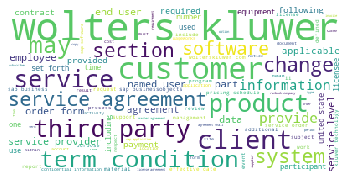

In [121]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [122]:
#Create a vector of word counts using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.6,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [123]:
cv.vocabulary_

{'nv': 5757,
 'zuidpoolsingel': 9995,
 'ze': 9982,
 'alphen': 472,
 'aan': 1,
 'den': 2495,
 'rijn': 7379,
 'box': 1096,
 'ba': 898,
 'netherlands': 5583,
 'www': 9952,
 'wolterskluwer': 9895,
 'investis': 4443,
 'limited': 4870,
 'attn': 779,
 'mr': 5451,
 'fashion': 3375,
 'street': 8551,
 'london': 4962,
 'united': 9240,
 'kingdom': 4554,
 'november': 5716,
 'tel': 8868,
 'inter': 4387,
 'company': 1650,
 'assignment': 717,
 'wk': 9814,
 'mail': 5020,
 'mthompson': 5464,
 'dear': 2389,
 'letter': 4725,
 'inform': 4252,
 'hereby': 3868,
 'assigns': 721,
 'january': 4503,
 'professional': 6646,
 'sale': 7493,
 'order': 5906,
 'form': 3569,
 'march': 5139,
 'including': 4152,
 'right': 7347,
 'obligation': 5777,
 'subsidiary': 8622,
 'corporation': 1989,
 'technology': 8846,
 'sincerely': 8219,
 'maarten': 5005,
 'thompson': 8998,
 'vice': 9556,
 'president': 6516,
 'general': 3703,
 'counsel': 2006,
 'secretary': 7736,
 'chamber': 1368,
 'commerce': 1624,
 'date subject': 2340,
 'subj

[Text(0, 0, 'service'),
 Text(0, 0, 'agreement'),
 Text(0, 0, 'shall'),
 Text(0, 0, 'sap'),
 Text(0, 0, 'software'),
 Text(0, 0, 'customer'),
 Text(0, 0, 'kluwer'),
 Text(0, 0, 'user'),
 Text(0, 0, 'party'),
 Text(0, 0, 'term'),
 Text(0, 0, 'wolters'),
 Text(0, 0, 'use'),
 Text(0, 0, 'order'),
 Text(0, 0, 'may'),
 Text(0, 0, 'date'),
 Text(0, 0, 'data'),
 Text(0, 0, 'information'),
 Text(0, 0, 'change'),
 Text(0, 0, 'license'),
 Text(0, 0, 'client')]

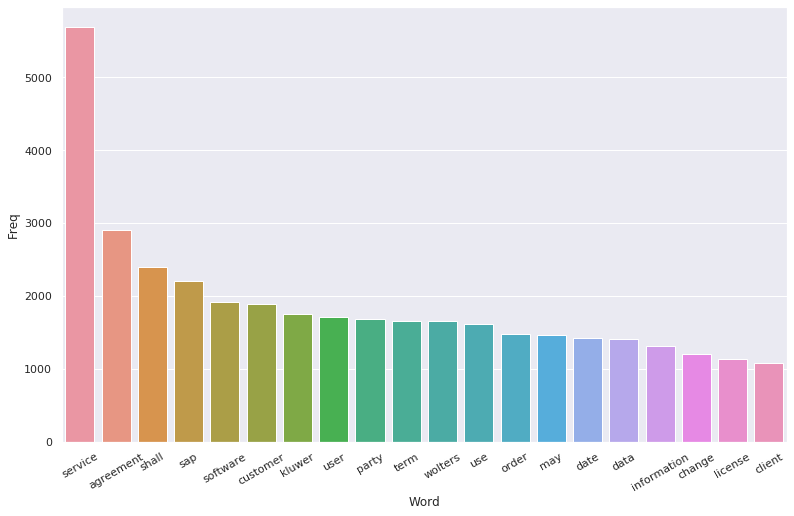

In [124]:
#Most frequently occuring uni-grams
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'wolters kluwer'),
 Text(0, 0, 'third party'),
 Text(0, 0, 'term condition'),
 Text(0, 0, 'service agreement'),
 Text(0, 0, 'service provider'),
 Text(0, 0, 'end user'),
 Text(0, 0, 'named user'),
 Text(0, 0, 'order form'),
 Text(0, 0, 'service level'),
 Text(0, 0, 'set forth'),
 Text(0, 0, 'united state'),
 Text(0, 0, 'sap businessobjects'),
 Text(0, 0, 'service order'),
 Text(0, 0, 'wolterskluwer com'),
 Text(0, 0, 'effective date'),
 Text(0, 0, 'pricing schedule'),
 Text(0, 0, 'sap business'),
 Text(0, 0, 'kluwer technology'),
 Text(0, 0, 'confidential information'),
 Text(0, 0, 'sap software')]

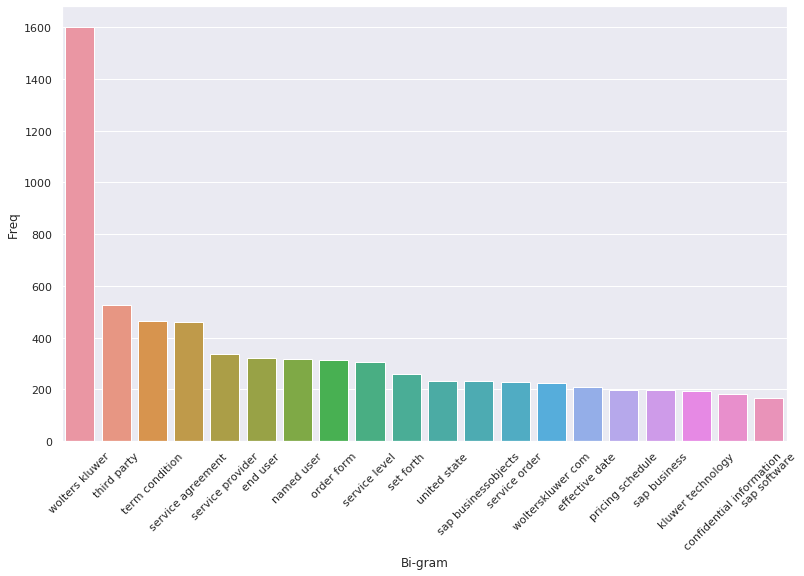

In [125]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

[Text(0, 0, 'wolters kluwer technology'),
 Text(0, 0, 'wolters kluwer nv'),
 Text(0, 0, 'sap business one'),
 Text(0, 0, 'alphen aan den'),
 Text(0, 0, 'aan den rijn'),
 Text(0, 0, 'agreement wolters kluwer'),
 Text(0, 0, 'wolters kluwer ltre'),
 Text(0, 0, 'service hewitt perform'),
 Text(0, 0, 'kluwer financial service'),
 Text(0, 0, 'kluwer united state'),
 Text(0, 0, 'user named user'),
 Text(0, 0, 'page wolters kluwer'),
 Text(0, 0, 'software use right'),
 Text(0, 0, 'general term condition'),
 Text(0, 0, 'wolters kluwer financial'),
 Text(0, 0, 'confidential information page'),
 Text(0, 0, 'wolters kluwer united'),
 Text(0, 0, 'third party software'),
 Text(0, 0, 'united state inc'),
 Text(0, 0, 'name wolters kluwer')]

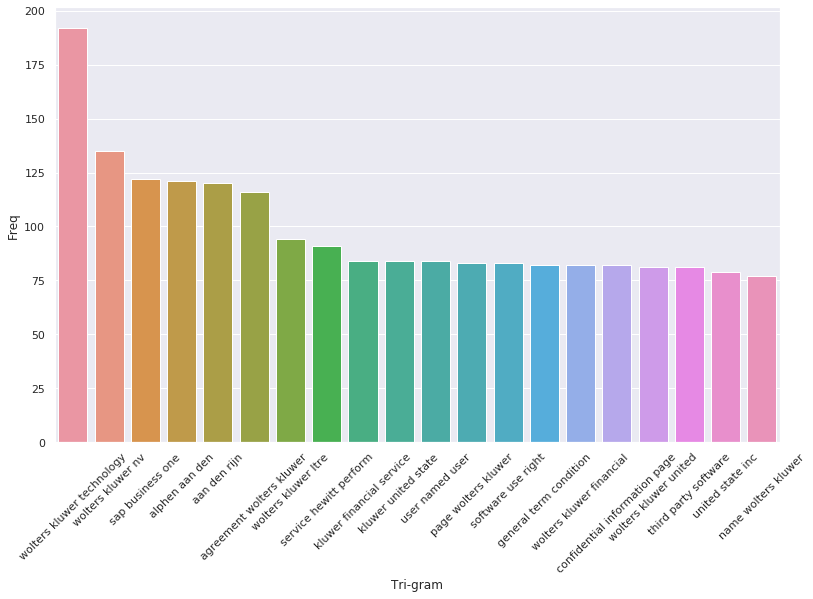

In [126]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [127]:
top1_words = get_top_n_words(corpus)
top2_words = get_top_n2_words(corpus)
top3_words = get_top_n3_words(corpus)
top_words = pd.DataFrame(list(zip(top1_words, top2_words, top3_words)), columns=['Top1','Top2','Top3'])
top_words.head()

,Top1,Top2,Top3
0,"(service, 5683)","(wolters kluwer, 1601)","(wolters kluwer technology, 192)"
1,"(agreement, 2905)","(third party, 528)","(wolters kluwer nv, 135)"
2,"(shall, 2399)","(term condition, 465)","(sap business one, 122)"
3,"(sap, 2207)","(service agreement, 460)","(alphen aan den, 121)"
4,"(software, 1913)","(service provider, 336)","(aan den rijn, 120)"


In [128]:
top_words.to_csv('top_words_others.csv', index=None)

#Converting to a matrix of integers with TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[402]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

In [144]:
from snorkel.labeling import LabelingFunction
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier

msa_keywords = ['set forth section', 'meaning set forth', 'including without limitation', 
                'prior written consent', 'without prior written', 'intellectual industrial property', 
                'industrial property right', 'intellectual property right',  'privacy restricted data', 
                'prior written notice', 'force majeure event',  'subject matter hereof', 'confidential information',
                'work product', 'shall deemed', 'disclosing party', 'without limitation', 'indemnified party', 
                'indemnifying party', 'applicable law', 'force majeure', 'trade secret', 'obligation agreement', 
                'intellectual industrial']

addendum_keywords = ['addendum', 'amendment', 'book production', 'production health', 'agreement amendment', 
                     'agreement addendum', 'addendum number', 'addendum executed', 'amendment agreement', 'sow subsequent', 
                     'subsequent addendum', 'addendum made', 'amendment number', 'amendment date', 'amendment entered', 
                     'amendment made', 'amendment executed', 'amendment term', 'amendment effective date', 
                     'inconsistent contradictory term', 'addendum may executed', 'addendum made entered', 'effective date addendum', 
                     'addendum statement work', 'amendment made entered', 'addendum effective date', 
                     'effective date amendment', 'amend agreement', 'agreement amended', 'agreement hereby amended', 
                     'service agreement amendment']

sow_keywords = ['statement work','sow','term sow','sow effective date', 'work sow', 'sow shall', 'sow consultant',
                'sow term', 'service sow', 'sow project', 'defined sow','specified sow','outlined sow','msa sow',
                'addendum sow', 'client sow','sow client', 'sow agreement', 'statement work effective', 
                'agreement statement work']

nda_keywords = ['mutual confidentiality', 'affiliated entity', 'agreement negotiation', 'disclosure hereunder', 'confidentiality confidential', 'protect confidentiality', 'mutual confidentiality agreement', 'disclosure confidential information', 'non disclosure agreement', 'non confidential basis', 'confidential information agent', 'confidentiality non disclosure', 'disclosing party prompt', 'notice intent terminate']

ABSTAIN = -1
#MSA = 1
#ADDENDUM = 0
#SOW = 4
#OTHERS = 3
NDA = 2

def keyword_lookup(x, keywords, label):
    if any(word in x.text.lower() for word in keywords):
        return label
    return ABSTAIN


def make_keyword_lf(keywords, label=NDA):
    return LabelingFunction(
        name=f"keyword_{keywords[0]}",
        f=keyword_lookup,
        resources=dict(keywords=keywords, label=label))

labl_functions = []
for key in nda_keywords:
    labl_functions.append(make_keyword_lf([key]))

@labeling_function()
def others_lookup(x):
    if all(word not in x.text.lower() for word in list(set(msa_keywords + sow_keywords +  nda_keywords + addendum_keywords))):
        return OTHERS
    return ABSTAIN
#labl_functions.append(others_lookup)
print(labl_functions)

applier = PandasLFApplier(lfs=labl_functions)
L_train = applier.apply(df=df_nda)

/home/user/anaconda3/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 134/134 [00:00<00:00, 3210.48it/s]

[LabelingFunction keyword_mutual confidentiality, Preprocessors: [], LabelingFunction keyword_affiliated entity, Preprocessors: [], LabelingFunction keyword_agreement negotiation, Preprocessors: [], LabelingFunction keyword_disclosure hereunder, Preprocessors: [], LabelingFunction keyword_confidentiality confidential, Preprocessors: [], LabelingFunction keyword_protect confidentiality, Preprocessors: [], LabelingFunction keyword_mutual confidentiality agreement, Preprocessors: [], LabelingFunction keyword_disclosure confidential information, Preprocessors: [], LabelingFunction keyword_non disclosure agreement, Preprocessors: [], LabelingFunction keyword_non confidential basis, Preprocessors: [], LabelingFunction keyword_confidential information agent, Preprocessors: [], LabelingFunction keyword_confidentiality non disclosure, Preprocessors: [], LabelingFunction keyword_disclosing party prompt, Preprocessors: [], LabelingFunction keyword_notice intent terminate, Preprocessors: []]


In [145]:
y_nda = df_nda[df_nda.label == 'NDA']['label'].map({'Addendum': 0, 'MSA': 1, 'SOW': 4, 'NDA': 2, 'Others': 3}).values

In [146]:
from snorkel.labeling import LFAnalysis
LFAnalysis(L=L_train, lfs=labl_functions).lf_summary(y_nda).sort_values(by='Emp. Acc.')

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
keyword_mutual confidentiality,0,[2],0.604478,0.604478,0.0,81,0,1.0
keyword_affiliated entity,1,[2],0.492537,0.485075,0.0,66,0,1.0
keyword_agreement negotiation,2,[2],0.485075,0.485075,0.0,65,0,1.0
keyword_disclosure hereunder,3,[2],0.664179,0.649254,0.0,89,0,1.0
keyword_confidentiality confidential,4,[2],0.477612,0.477612,0.0,64,0,1.0
keyword_protect confidentiality,5,[2],0.432836,0.425373,0.0,58,0,1.0
keyword_mutual confidentiality agreement,6,[2],0.492537,0.492537,0.0,66,0,1.0
keyword_disclosure confidential information,7,[2],0.626866,0.604478,0.0,84,0,1.0
keyword_non disclosure agreement,8,[2],0.514925,0.500000,0.0,69,0,1.0
keyword_non confidential basis,9,[2],0.537313,0.537313,0.0,72,0,1.0
